In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats

In [2]:
# Load data
data = pd.read_csv("datasetFinal.csv")
data = data.drop(data.columns[0], axis=1)

In [3]:
data.head(20)

,DayOfYear,Month,Date,Temperature (°C),Humidity (%),DewPoint,Precipitation (mm),Dengue
0,4,Jan,4,26.9,66,20,0,27.571429
1,5,Jan,5,26.1,71.5,20.6,0,27.571429
2,6,Jan,6,26.6,77.3,22.4,0,27.571429
3,7,Jan,7,26.5,83.8,23.3,0,27.571429
4,8,Jan,8,27.6,78.8,23.3,0,27.571429
5,9,Jan,9,28.2,76.8,23.3,0,27.571429
6,10,Jan,10,26.4,80.9,22.7,0,27.571429
7,11,Jan,11,26.7,78.7,22.6,0,42.714286
8,12,Jan,12,25.4,83.5,22.6,0,42.714286
9,13,Jan,13,26.9,77,22.1,0,42.714286


In [4]:
# Map month names to numbers
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
data['Month'] = data['Month'].map(month_mapping)

In [5]:
# Convert non-numeric values to NaN and handle missing values
data = data.apply(pd.to_numeric, errors='coerce')
data.fillna(data.mean(), inplace=True)

In [6]:
data.head(20)

,DayOfYear,Month,Date,Temperature (°C),Humidity (%),DewPoint,Precipitation (mm),Dengue
0,4,1,4,26.9,66.0,20.0,0.0,27.571429
1,5,1,5,26.1,71.5,20.6,0.0,27.571429
2,6,1,6,26.6,77.3,22.4,0.0,27.571429
3,7,1,7,26.5,83.8,23.3,0.0,27.571429
4,8,1,8,27.6,78.8,23.3,0.0,27.571429
5,9,1,9,28.2,76.8,23.3,0.0,27.571429
6,10,1,10,26.4,80.9,22.7,0.0,27.571429
7,11,1,11,26.7,78.7,22.6,0.0,42.714286
8,12,1,12,25.4,83.5,22.6,0.0,42.714286
9,13,1,13,26.9,77.0,22.1,0.0,42.714286


In [7]:
# Create lag features for weather data
for lag in range(1, 15):
    data[f'Temperature_lag_{lag}'] = data['Temperature (°C)'].shift(lag)
    data[f'Humidity_lag_{lag}'] = data['Humidity (%)'].shift(lag)
    data[f'DewPoint_lag_{lag}'] = data['DewPoint'].shift(lag)
    data[f'Precipitation_lag_{lag}'] = data['Precipitation (mm)'].shift(lag)

# Create rolling statistics for dengue cases
data['Dengue_rolling_mean_14'] = data['Dengue'].rolling(window=14).mean()
data['Dengue_rolling_std_14'] = data['Dengue'].rolling(window=14).std()

In [8]:
data.head(20)

,DayOfYear,Month,Date,Temperature (°C),Humidity (%),DewPoint,Precipitation (mm),Dengue,Temperature_lag_1,Humidity_lag_1,...,Temperature_lag_13,Humidity_lag_13,DewPoint_lag_13,Precipitation_lag_13,Temperature_lag_14,Humidity_lag_14,DewPoint_lag_14,Precipitation_lag_14,Dengue_rolling_mean_14,Dengue_rolling_std_14
0,4,1,4,26.9,66.0,20.0,0.0,27.571429,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,1,5,26.1,71.5,20.6,0.0,27.571429,26.9,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,1,6,26.6,77.3,22.4,0.0,27.571429,26.1,71.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,1,7,26.5,83.8,23.3,0.0,27.571429,26.6,77.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,1,8,27.6,78.8,23.3,0.0,27.571429,26.5,83.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,9,1,9,28.2,76.8,23.3,0.0,27.571429,27.6,78.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10,1,10,26.4,80.9,22.7,0.0,27.571429,28.2,76.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,11,1,11,26.7,78.7,22.6,0.0,42.714286,26.4,80.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,12,1,12,25.4,83.5,22.6,0.0,42.714286,26.7,78.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,13,1,13,26.9,77.0,22.1,0.0,42.714286,25.4,83.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Create future target variables
forecast_days = 7
for i in range(1, forecast_days + 1):
    data[f'Dengue_future_{i}'] = data['Dengue'].shift(-i)

In [10]:
data.head(20)

,DayOfYear,Month,Date,Temperature (°C),Humidity (%),DewPoint,Precipitation (mm),Dengue,Temperature_lag_1,Humidity_lag_1,...,Precipitation_lag_14,Dengue_rolling_mean_14,Dengue_rolling_std_14,Dengue_future_1,Dengue_future_2,Dengue_future_3,Dengue_future_4,Dengue_future_5,Dengue_future_6,Dengue_future_7
0,4,1,4,26.9,66.0,20.0,0.0,27.571429,NaN,NaN,...,NaN,NaN,NaN,27.571429,27.571429,27.571429,27.571429,27.571429,27.571429,42.714286
1,5,1,5,26.1,71.5,20.6,0.0,27.571429,26.9,66.0,...,NaN,NaN,NaN,27.571429,27.571429,27.571429,27.571429,27.571429,42.714286,42.714286
2,6,1,6,26.6,77.3,22.4,0.0,27.571429,26.1,71.5,...,NaN,NaN,NaN,27.571429,27.571429,27.571429,27.571429,42.714286,42.714286,42.714286
3,7,1,7,26.5,83.8,23.3,0.0,27.571429,26.6,77.3,...,NaN,NaN,NaN,27.571429,27.571429,27.571429,42.714286,42.714286,42.714286,42.714286
4,8,1,8,27.6,78.8,23.3,0.0,27.571429,26.5,83.8,...,NaN,NaN,NaN,27.571429,27.571429,42.714286,42.714286,42.714286,42.714286,42.714286
5,9,1,9,28.2,76.8,23.3,0.0,27.571429,27.6,78.8,...,NaN,NaN,NaN,27.571429,42.714286,42.714286,42.714286,42.714286,42.714286,42.714286
6,10,1,10,26.4,80.9,22.7,0.0,27.571429,28.2,76.8,...,NaN,NaN,NaN,42.714286,42.714286,42.714286,42.714286,42.714286,42.714286,42.714286
7,11,1,11,26.7,78.7,22.6,0.0,42.714286,26.4,80.9,...,NaN,NaN,NaN,42.714286,42.714286,42.714286,42.714286,42.714286,42.714286,28.571429
8,12,1,12,25.4,83.5,22.6,0.0,42.714286,26.7,78.7,...,NaN,NaN,NaN,42.714286,42.714286,42.714286,42.714286,42.714286,28.571429,28.571429
9,13,1,13,26.9,77.0,22.1,0.0,42.714286,25.4,83.5,...,NaN,NaN,NaN,42.714286,42.714286,42.714286,42.714286,28.571429,28.571429,28.571429


In [11]:
# Drop rows with NaN values
data = data.dropna()

In [12]:
data.head(20)

,DayOfYear,Month,Date,Temperature (°C),Humidity (%),DewPoint,Precipitation (mm),Dengue,Temperature_lag_1,Humidity_lag_1,...,Precipitation_lag_14,Dengue_rolling_mean_14,Dengue_rolling_std_14,Dengue_future_1,Dengue_future_2,Dengue_future_3,Dengue_future_4,Dengue_future_5,Dengue_future_6,Dengue_future_7
14,18,1,18,26.4,75.7,21.9,0.0,28.571429,27.1,70.5,...,0.0,35.214286,7.787352,28.571429,28.571429,28.571429,28.571429,28.571429,28.571429,20.285714
15,19,1,19,26.6,71.6,20.8,0.0,28.571429,26.4,75.7,...,0.0,35.285714,7.716117,28.571429,28.571429,28.571429,28.571429,28.571429,20.285714,20.285714
16,20,1,20,27.1,68.9,20.8,0.0,28.571429,26.6,71.6,...,0.0,35.357143,7.643499,28.571429,28.571429,28.571429,28.571429,20.285714,20.285714,20.285714
17,21,1,21,27.8,66.9,21.0,0.0,28.571429,27.1,68.9,...,0.0,35.428571,7.569459,28.571429,28.571429,28.571429,20.285714,20.285714,20.285714,20.285714
18,22,1,22,27.5,72.5,22.1,0.0,28.571429,27.8,66.9,...,0.0,35.500000,7.493954,28.571429,28.571429,20.285714,20.285714,20.285714,20.285714,20.285714
19,23,1,23,27.8,77.4,23.0,0.0,28.571429,27.5,72.5,...,0.0,35.571429,7.416939,28.571429,20.285714,20.285714,20.285714,20.285714,20.285714,20.285714
20,24,1,24,27.0,73.1,21.8,0.0,28.571429,27.8,77.4,...,0.0,35.642857,7.338368,20.285714,20.285714,20.285714,20.285714,20.285714,20.285714,20.285714
21,25,1,25,27.4,63.9,19.4,0.0,20.285714,27.0,73.1,...,0.0,34.040816,8.085964,20.285714,20.285714,20.285714,20.285714,20.285714,20.285714,16.857143
22,26,1,26,26.9,63.9,19.1,0.0,20.285714,27.4,63.9,...,0.0,32.438776,8.449028,20.285714,20.285714,20.285714,20.285714,20.285714,16.857143,16.857143
23,27,1,27,27.0,63.4,19.4,0.0,20.285714,26.9,63.9,...,0.0,30.836735,8.477111,20.285714,20.285714,20.285714,20.285714,16.857143,16.857143,16.857143


In [13]:
# Prepare data for training
X = data[
    [f'Temperature_lag_{i}' for i in range(1, 15)] +
    [f'Humidity_lag_{i}' for i in range(1, 15)] +
    [f'DewPoint_lag_{i}' for i in range(1, 15)] +
    [f'Precipitation_lag_{i}' for i in range(1, 15)] +
    ['Dengue_rolling_mean_14', 'Dengue_rolling_std_14']
]
y = data['Dengue_future_7']

In [14]:
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, Y_train)
rf_y_pred = rf_model.predict(X_test)
print(f"Random Forest MAE: {mean_absolute_error(Y_test, rf_y_pred)}")
print(f"Random Forest MSE: {mean_squared_error(Y_test, rf_y_pred)}")
print(f"Random Forest RMSE: {np.sqrt(mean_squared_error(Y_test, rf_y_pred))}")
print(f"Random Forest R^2: {r2_score(Y_test, rf_y_pred)}")

Random Forest MAE: 6.940026308866088
Random Forest MSE: 162.77521050099614
Random Forest RMSE: 12.75833886134853
Random Forest R^2: 0.872401816066779


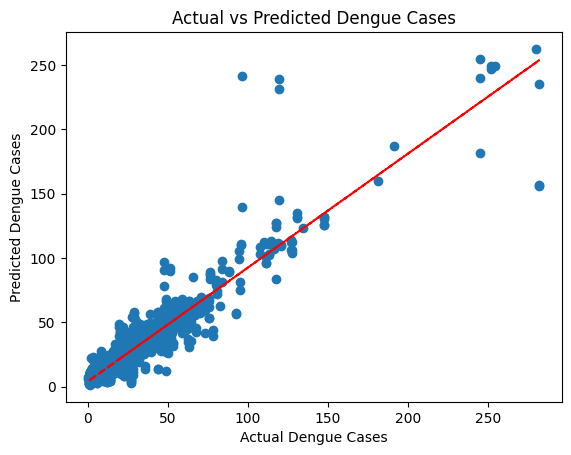

In [16]:
plt.scatter(Y_test, rf_y_pred)

# Fit a line to the data
m, b = np.polyfit(Y_test, rf_y_pred, 1)
plt.plot(Y_test, m*Y_test + b, color='red', linestyle='--')

plt.xlabel('Actual Dengue Cases')
plt.ylabel('Predicted Dengue Cases')
plt.title('Actual vs Predicted Dengue Cases')
plt.show()

In [17]:
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, Y_train)
gb_y_pred = gb_model.predict(X_test)
print(f"Gradient Boosting MAE: {mean_absolute_error(Y_test, gb_y_pred)}")
print(f"Gradient Boosting MSE: {mean_squared_error(Y_test, gb_y_pred)}")
print(f"Gradient Boosting RMSE: {np.sqrt(mean_squared_error(Y_test, gb_y_pred))}")
print(f"Gradient Boosting R^2: {r2_score(Y_test, gb_y_pred)}")

Gradient Boosting MAE: 7.723923734399339
Gradient Boosting MSE: 176.7337773328956
Gradient Boosting RMSE: 13.294125670118197
Gradient Boosting R^2: 0.8614598073138555


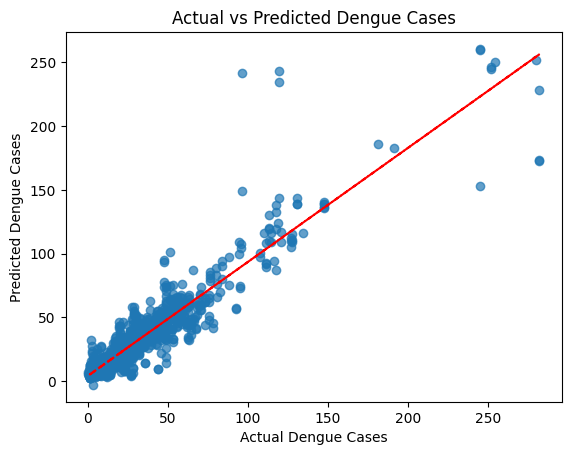

In [18]:
plt.scatter(Y_test, gb_y_pred, alpha=0.7)

# Fit a line to the data
m, b = np.polyfit(Y_test, gb_y_pred, 1)
plt.plot(Y_test, m*Y_test + b, color='red', linestyle='--')

plt.xlabel('Actual Dengue Cases')
plt.ylabel('Predicted Dengue Cases')
plt.title('Actual vs Predicted Dengue Cases')
plt.show()


In [19]:
# Neural Network Regressor
nn_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
nn_model.fit(X_train, Y_train)
nn_y_pred = nn_model.predict(X_test)
print(f"Neural Network MAE: {mean_absolute_error(Y_test, nn_y_pred)}")
print(f"Neural Network MSE: {mean_squared_error(Y_test, nn_y_pred)}")
print(f"Neural Network RMSE: {np.sqrt(mean_squarepd_error(Y_test, nn_y_pred))}")
print(f"Neural Network R^2: {r2_score(Y_test, nn_y_pred)}")

Neural Network MAE: 8.409045212410955
Neural Network MSE: 166.8946753653445
Neural Network RMSE: 12.918772208121966
Neural Network R^2: 0.8691726005501795


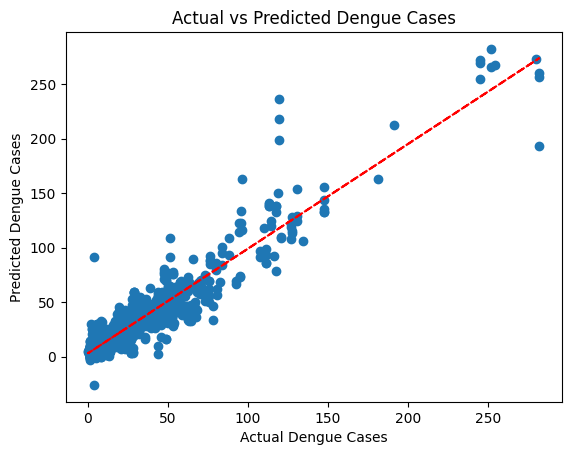

In [20]:
plt.scatter(Y_test, nn_y_pred)

# Fit a line to the data
m, b = np.polyfit(Y_test, nn_y_pred, 1)
plt.plot(Y_test, m*Y_test + b, color='red', linestyle='--')

plt.xlabel('Actual Dengue Cases')
plt.ylabel('Predicted Dengue Cases')
plt.title('Actual vs Predicted Dengue Cases')
plt.show()

In [21]:
# Outlier Detection and Removal
z_scores = np.abs(stats.zscore(X))
outliers = (z_scores > 3).all(axis=1)
X_clean = X[~outliers]
y_clean = y[~outliers]
X_train, X_test, Y_train, Y_test = train_test_split(X_clean, y_clean, test_size=0.3, random_state=42)


In [22]:
# Re-train Gradient Boosting Regressor after outlier removal
gb_model.fit(X_train, Y_train)
gb_y_pred = gb_model.predict(X_test)
print(f"Gradient Boosting MAE (cleaned): {mean_absolute_error(Y_test, gb_y_pred)}")
print(f"Gradient Boosting MSE (cleaned): {mean_squared_error(Y_test, gb_y_pred)}")
print(f"Gradient Boosting RMSE (cleaned): {np.sqrt(mean_squared_error(Y_test, gb_y_pred))}")
print(f"Gradient Boosting R^2 (cleaned): {r2_score(Y_test, gb_y_pred)}")

Gradient Boosting MAE (cleaned): 7.718480364181913
Gradient Boosting MSE (cleaned): 176.79482617106885
Gradient Boosting RMSE (cleaned): 13.2964215551053
Gradient Boosting R^2 (cleaned): 0.8614119516185186


In [23]:
baseline_prediction = np.mean(Y_train)
baseline_mae = mean_absolute_error(Y_test, [baseline_prediction] * len(Y_test))
print(f"Baseline MAE: {baseline_mae}")


Baseline MAE: 23.5074960014782


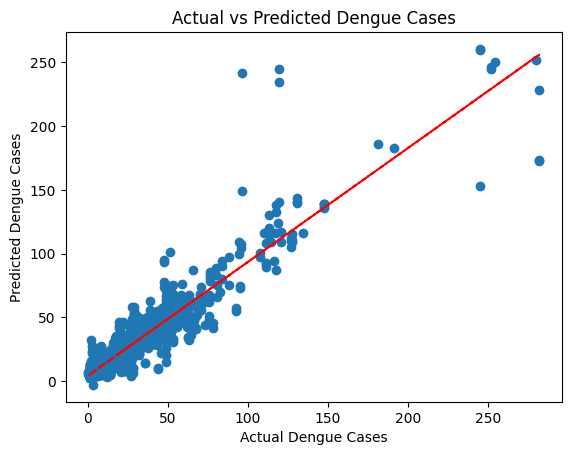

In [24]:
plt.scatter(Y_test, gb_y_pred)

# Fit a line to the data
m, b = np.polyfit(Y_test, gb_y_pred, 1)
plt.plot(Y_test, m*Y_test + b, color='red', linestyle='--')

plt.xlabel('Actual Dengue Cases')
plt.ylabel('Predicted Dengue Cases')
plt.title('Actual vs Predicted Dengue Cases')
plt.show()


In [25]:
from sklearn.model_selection import cross_val_score

rf_cv_scores = cross_val_score(RandomForestRegressor(), X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Random Forest Cross-Validation MSE: {-rf_cv_scores.mean()}")


Random Forest Cross-Validation MSE: 400.34176919982576


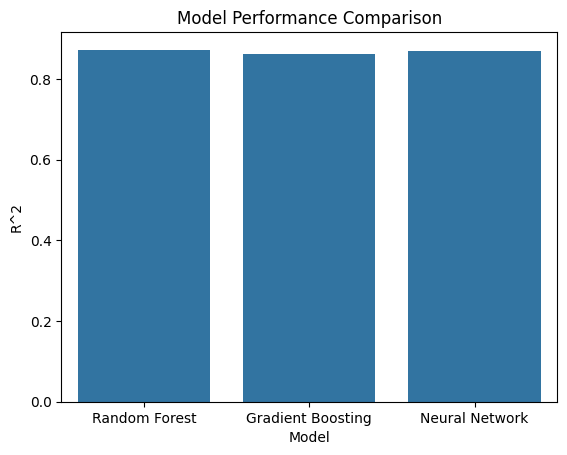

In [26]:
import seaborn as sns

results = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting', 'Neural Network'],
    'MAE': [mean_absolute_error(Y_test, rf_y_pred),
           mean_absolute_error(Y_test, gb_y_pred),
           mean_absolute_error(Y_test, nn_y_pred)],
    'MSE': [mean_squared_error(Y_test, rf_y_pred),
           mean_squared_error(Y_test, gb_y_pred),
           mean_squared_error(Y_test, nn_y_pred)],
    'RMSE': [np.sqrt(mean_squared_error(Y_test, rf_y_pred)),
             np.sqrt(mean_squared_error(Y_test, gb_y_pred)),
             np.sqrt(mean_squared_error(Y_test, nn_y_pred))],
    'R^2': [r2_score(Y_test, rf_y_pred),
            r2_score(Y_test, gb_y_pred),
            r2_score(Y_test, nn_y_pred)]
})

sns.barplot(x='Model', y='R^2', data=results)
plt.title('Model Performance Comparison')
plt.show()


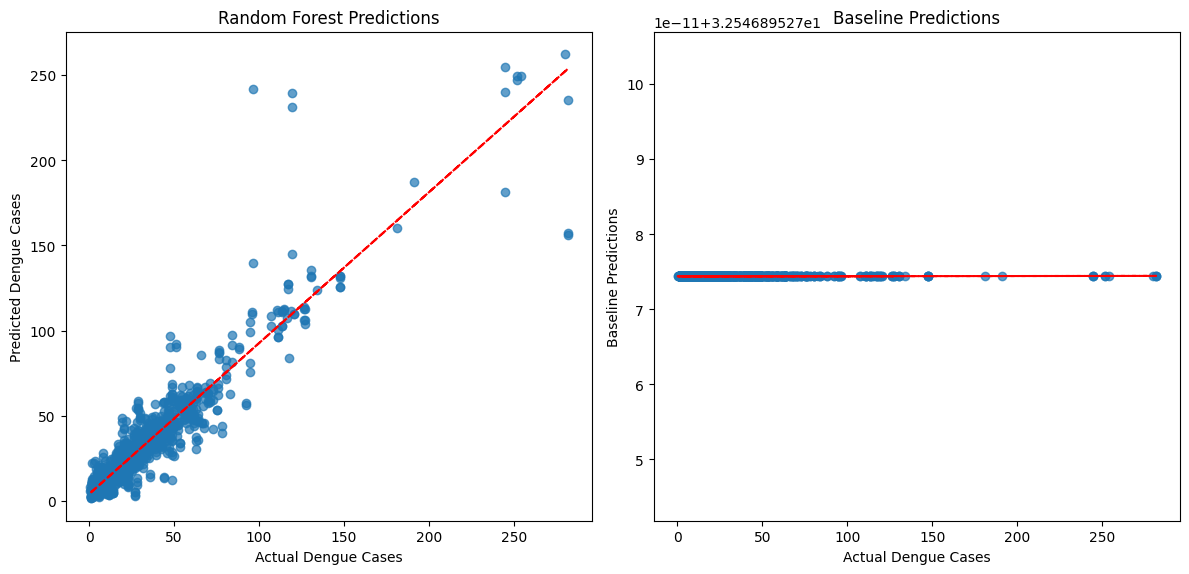

In [27]:
plt.figure(figsize=(12, 6))

# Random Forest Model
plt.subplot(1, 2, 1)
plt.scatter(Y_test, rf_y_pred, alpha=0.7)

# Fit a line to the data
m, b = np.polyfit(Y_test, rf_y_pred, 1)
plt.plot(Y_test, m*Y_test + b, color='red', linestyle='--')

plt.xlabel('Actual Dengue Cases')
plt.ylabel('Predicted Dengue Cases')
plt.title('Random Forest Predictions')

# Baseline Model
baseline_pred = np.mean(Y_train)
baseline_pred = [baseline_pred] * len(Y_test)
plt.subplot(1, 2, 2)
plt.scatter(Y_test, baseline_pred, alpha=0.7)

# Fit a line to the data
m, b = np.polyfit(Y_test, baseline_pred, 1)
plt.plot(Y_test, m*Y_test + b, color='red', linestyle='--')
plt.xlabel('Actual Dengue Cases')
plt.ylabel('Baseline Predictions')
plt.title('Baseline Predictions')

plt.tight_layout()
plt.show()
